# CodSoft Task : Sales Prediction using Python

In [25]:
# importing the libraries

!pip install scikit-learn
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

In [26]:
# loading the dataset

adv=pd.read_csv('advertising.csv.xls')

In [27]:
# displaying the summary of the dataset

adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [28]:
#displaying the dataset from the end 

adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [29]:
#displaying information about the dataset

adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [30]:
#displaying null 

adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [31]:
#describing the dataset

adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


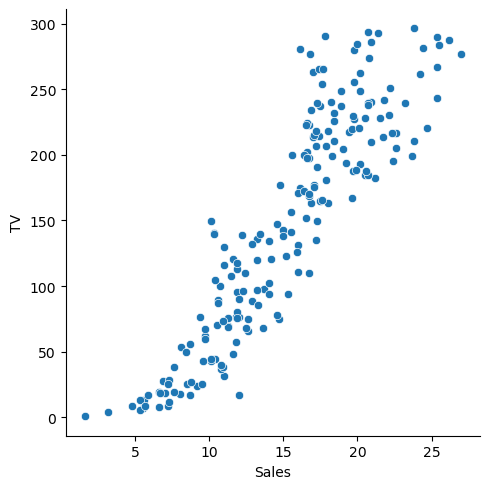

In [32]:
# visualisation of TV Sales 
# strong positive linear relationship for highest sales, others are weak

sns.relplot(x='Sales', y='TV',data=adv) 

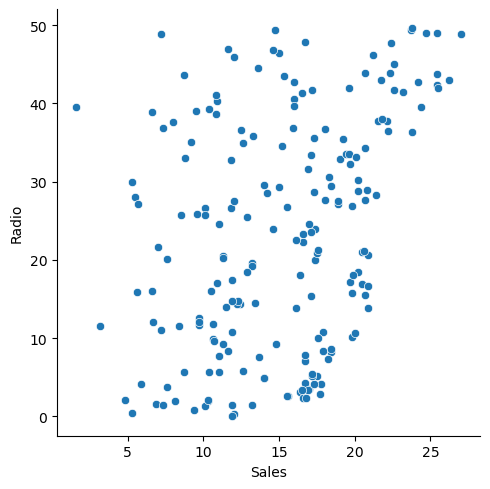

In [33]:
# Visualisation of Radio sales 

sns.relplot(x='Sales', y='Radio',data=adv)

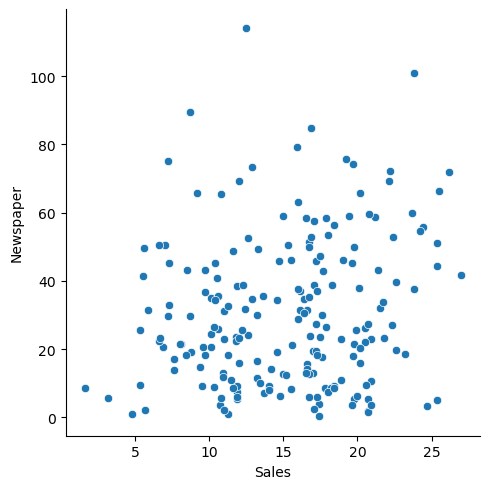

In [34]:
# Visualisation of Newspaper sales 

sns.relplot(x='Sales', y='Newspaper',data=adv)

In [35]:
#since variable TV is most corelated with sales we take it as the main variable for analysis

X = adv['TV']
Y = adv['Sales']

In [36]:
# spliting dataset into training and testing subsets which helps to evaluate model performance.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=37)

In [37]:
X_train.head()

18      69.2
144     96.2
94     107.4
127     80.2
64     131.1
Name: TV, dtype: float64

In [41]:
# importing library
from sklearn.linear_model import LinearRegression

# loading and preparing data
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv['Sales']

# Splitting Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
Y_prediction = model.predict(X_test)

In [43]:
# importing necessary files
from sklearn.metrics import mean_squared_error, r2_score

# calculating mean squared error
m_sq_error = mean_squared_error(Y_test, Y_prediction)

# calculating r squared score
r_score = r2_score(Y_test, Y_prediction)

#printing values 
print("Mean Squared Error:", m_sq_error)
print("R-squared:", r_score)

# r2 values which are close to 1 are considered a perfect fit 
# which indicated the usefullness of the metric for evaluating the model's overall performance

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [44]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
